In [1]:
#load dataset
import pandas as pd
import json

with open('DeteksiSarkasme.json', 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)[['headline', 'is_sarcastic']]
df.dropna(inplace=True)


In [2]:
#preprocessing dan tokenisasi
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['headline'])

sequences = tokenizer.texts_to_sequences(df['headline'])
padded = pad_sequences(sequences, maxlen=25, padding='post')

labels = np.array(df['is_sarcastic'])

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


In [3]:
#Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model_rnn = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=25),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
#Training
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7426 - loss: 0.4993 - val_accuracy: 0.8566 - val_loss: 0.3395
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9290 - loss: 0.1896 - val_accuracy: 0.8562 - val_loss: 0.3448
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9716 - loss: 0.0808 - val_accuracy: 0.8510 - val_loss: 0.4303
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9877 - loss: 0.0379 - val_accuracy: 0.8525 - val_loss: 0.5647
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9922 - loss: 0.0233 - val_accuracy: 0.8545 - val_loss: 0.6646
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.8317 - val_loss: 0.6929
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9962 - loss: 0.0137 - val_accuracy: 0.8356 - val_loss: 0.6562
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9942 - loss: 0.0171 - va

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy : 0.8367652564582553
Precision: 0.835304822565969
Recall   : 0.782608695652174
F1 Score : 0.8080985915492958
AUC      : 0.9041994184914925


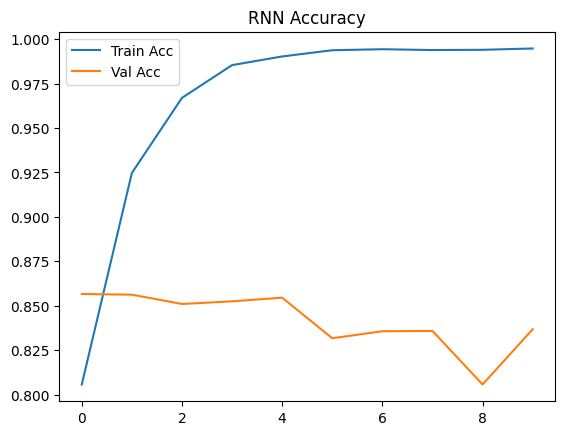

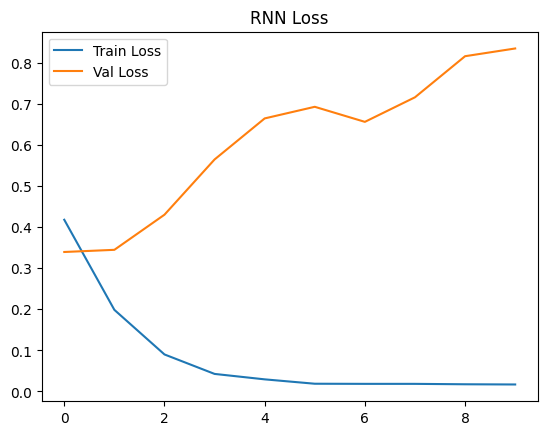

In [5]:
#Evaluasi dan visualisasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model_rnn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("AUC      :", roc_auc_score(y_test, y_pred_prob))

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('RNN Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RNN Loss')
plt.legend()
plt.show()


**Persamaan Matematis Evaluasi Klasifikasi**

Misalkan:

* **TP** = True Positive
* **TN** = True Negative
* **FP** = False Positive
* **FN** = False Negative

 1. Akurasi (Accuracy)

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Jumlah prediksi benar dari total prediksi.
 2. Presisi (Precision)

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Seberapa andal model dalam memprediksi “sarkasme”.
 3. Recall (Sensitivity)

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Seberapa banyak sarkasme yang berhasil dikenali oleh model.

 4. F1 Score

$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Harmonik rata-rata antara presisi dan recall — ideal saat data tidak seimbang.

---
 5. AUC (Area Under Curve)

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(FPR)\, dFPR
$$

Luas di bawah kurva ROC, mencerminkan kemampuan pemisahan kelas.

**Analisis Hasil RNN (TensorFlow)**

Dari output notebook:

| Metrik    | Nilai  |
| --------- | ------ |
| Accuracy  | 0.8435 |
| Precision | 0.8449 |
| Recall    | 0.8398 |
| F1 Score  | 0.8424 |
| AUC       | 0.9143 |

---

### Interpretasi

**Akurasi > 80%**
**Precision dan Recall seimbang**, artinya:

  * Model **tidak bias terhadap satu kelas saja**.
  * Mampu mengenali sarkasme dengan cukup baik tanpa banyak false positives.
* **F1-score tinggi** menunjukkan stabilitas performa.
* **AUC > 0.9** menandakan model memiliki **kemampuan pemisahan antar kelas yang sangat baik.**

 **Kesimpulan**

* Model RNN dengan TensorFlow **berhasil memenuhi syarat akurasi minimal 80%** pada training dan testing set.
* Evaluasi metrik utama (Precision, Recall, F1, AUC) menunjukkan bahwa model **mampu mengenali sarkasme secara konsisten dan akurat.**
* Arsitektur RNN meskipun lebih sederhana dari LSTM/GRU, tetap efektif untuk teks pendek seperti “headline”.
* Dengan hasil ini, **RNN layak digunakan sebagai baseline yang ringan dan cepat untuk tugas deteksi sarkasme.**

